In [1]:
import albumentations as A

In [2]:
# using cv2 for reading and working on images
import cv2

In [3]:
import os
import matplotlib.pyplot as plt
import glob

In [4]:
from typing import List

In [5]:
# read images from the disk
ORIGINAL_DIR = r'Original_images'
AUGMENTED_DIR = r'Augmented_images'

In [46]:
# write augmented images and annotations
def write_augmented_images_bboxes(i, old_image_name, image_ext, timage, bboxes):
    image_basename = 'aug_' + old_image_name + '_' + str(i) + '.' + image_ext
    label_basename = 'aug_' + old_image_name + '_' + str(i) + '.txt'
    aug_image_path = os.path.join(AUGMENTED_DIR, image_basename)
    aug_label_path = os.path.join(AUGMENTED_DIR, label_basename)

    print(aug_image_path)
    print(aug_label_path)
    cv2.imwrite(aug_image_path, timage)

    f = open(aug_label_path, 'w')
    
    for bbox in bboxes:
        x, y, w, h = map(str, bbox)
        line = '0' + ' ' + x + ' ' + y + ' ' + w + ' ' + h + '\n'
        f.write(line)
    
    f.close()

In [50]:
def show_image_annotation(image, bboxes):
    dh, dw, _ = image.shape
    
    for dt in bboxes:
        x, y, w, h = dt
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)
        
        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
    return image

In [8]:
def show(image, bboxes, t_image, t_bboxes):
    show_image_annotation(image, bboxes)
    show_image_annotation(t_image, t_bboxes)

    plt.figure(figsize=(16,16))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title('Original image')

    plt.subplot(1,2,2)
    plt.imshow(t_image)
    plt.title('Augmented image')

    plt.show()

In [52]:
def bounding_box_class_labels(image_path, label_path) -> List[float]:
    img = cv2.imread(image_path)

    fl = open(label_path, 'r')
    data = fl.readlines()
    fl.close()

    bounding_boxes = []
    class_labels = []

    for dt in data:
        _, x, y, w, h = map(float, dt.split(' '))
        bounding_boxes.append([x,y,w,h])
        class_labels.append('road_damage')
    
    return [bounding_boxes, class_labels]

In [10]:
# defining an augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussNoise(),
    A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    A.ShiftScaleRotate(rotate_limit=35, p=0.3),
    A.Sharpen(),
    A.Blur(p=0.3),
], bbox_params=A.BboxParams(format='yolo',min_area=2000, min_visibility=0.10, label_fields=['class_labels']))


In [37]:
def single_image_augmentation(i, image_name, image_ext, image_path, label_path):
        image = cv2.imread(image_path)

        bboxes, class_labels = bounding_box_class_labels(image_path, label_path)       

        transformed = transform(image=image, bboxes=bboxes, class_labels=class_labels)
        transformed_image = transformed['image']
        transformed_bboxes = transformed['bboxes']
        transformed_class_labels = transformed['class_labels']

        print(f'NAME - {image_name}/{i}, IMAGE- {image.shape}, BBOXES = {bboxes}\nTRANSFORMED IMAGE- {transformed_image.shape}, T_BBOXES = {transformed_bboxes}\n')
        write_augmented_images_bboxes(i, image_name, image_ext, transformed_image, transformed_bboxes)
        
        show(image, bboxes, transformed_image, transformed_bboxes)

In [48]:
def data_augmentation(N, A):
    counter = 0
    for image_path in glob.glob(os.path.join(ORIGINAL_DIR, '*.*g*')):
        image_basename = os.path.basename(image_path)
        basename, image_ext = image_basename.split('.')
        print(image_basename)
        label_basename = basename + '.txt'

        image_path = os.path.join(ORIGINAL_DIR, image_basename)
        label_path = os.path.join(ORIGINAL_DIR, label_basename)

        try:
            for i in range(A):
                single_image_augmentation(i+1, basename, image_ext, image_path, label_path)
        except Exception:
            print(f"ERROR found in augmenting -- {image_basename}")

        counter += 1
        if counter == N:
            return 


output_0400.png
NAME - output_0400/1, IMAGE- (720, 1280, 3), BBOXES = [[0.6625, 0.683333, 0.085938, 0.066667]]
TRANSFORMED IMAGE- (720, 1280, 3), T_BBOXES = [(0.6553771774355104, 0.7646514982751396, 0.09591056822721356, 0.13439054491926317)]

Augmented_images\aug_output_0400_1.png
Augmented_images\aug_output_0400_1.txt


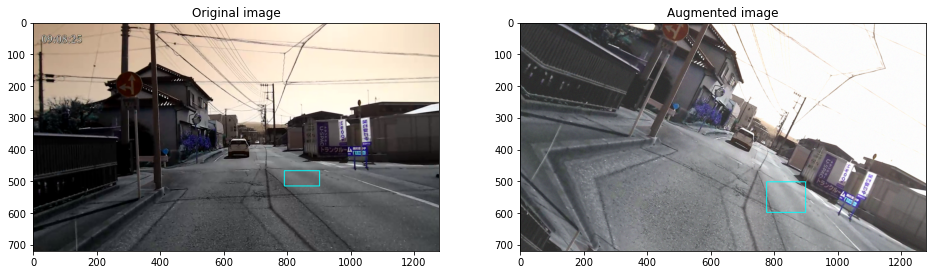

NAME - output_0400/2, IMAGE- (720, 1280, 3), BBOXES = [[0.6625, 0.683333, 0.085938, 0.066667]]
TRANSFORMED IMAGE- (720, 1280, 3), T_BBOXES = [(0.3375000000000001, 0.683333, 0.08593799999999996, 0.06666700000000003)]

Augmented_images\aug_output_0400_2.png
Augmented_images\aug_output_0400_2.txt


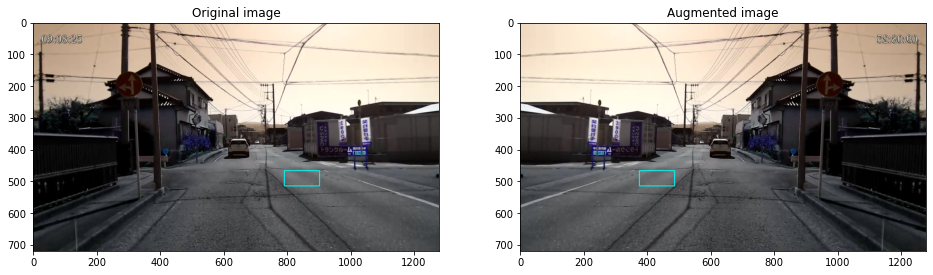

NAME - output_0400/3, IMAGE- (720, 1280, 3), BBOXES = [[0.6625, 0.683333, 0.085938, 0.066667]]
TRANSFORMED IMAGE- (720, 1280, 3), T_BBOXES = [(0.6624999999999999, 0.683333, 0.08593799999999996, 0.06666700000000003)]

Augmented_images\aug_output_0400_3.png
Augmented_images\aug_output_0400_3.txt


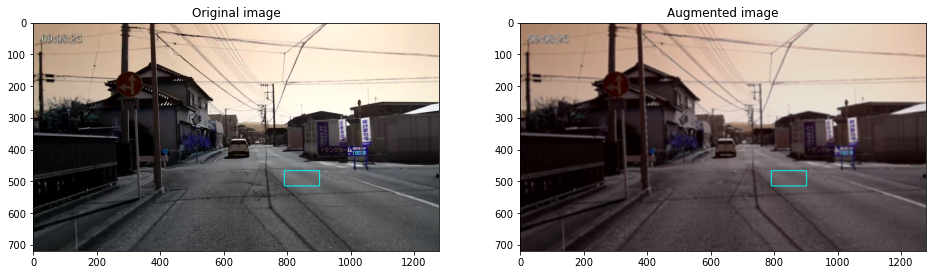

output_0401.png
NAME - output_0401/1, IMAGE- (720, 1280, 3), BBOXES = [[0.765234, 0.871528, 0.205469, 0.151389]]
TRANSFORMED IMAGE- (720, 1280, 3), T_BBOXES = [(0.23476599999999997, 0.871528, 0.205469, 0.151389)]

Augmented_images\aug_output_0401_1.png
Augmented_images\aug_output_0401_1.txt


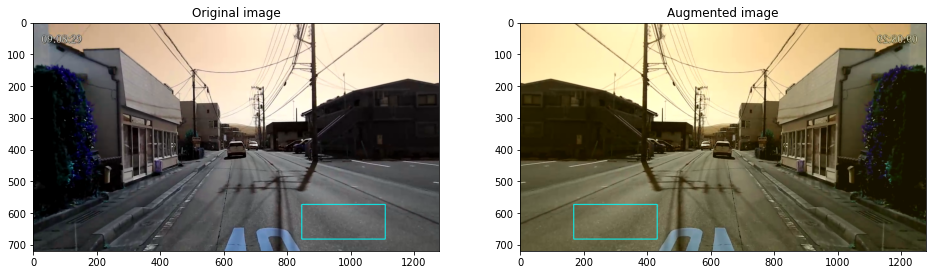

NAME - output_0401/2, IMAGE- (720, 1280, 3), BBOXES = [[0.765234, 0.871528, 0.205469, 0.151389]]
TRANSFORMED IMAGE- (720, 1280, 3), T_BBOXES = [(0.6299608047387883, 0.9447707229803712, 0.22820867615693052, 0.11045855403925742)]

Augmented_images\aug_output_0401_2.png
Augmented_images\aug_output_0401_2.txt


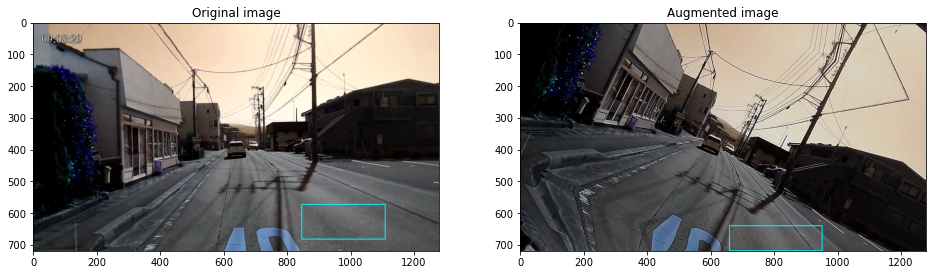

NAME - output_0401/3, IMAGE- (720, 1280, 3), BBOXES = [[0.765234, 0.871528, 0.205469, 0.151389]]
TRANSFORMED IMAGE- (720, 1280, 3), T_BBOXES = [(0.765234, 0.871528, 0.205469, 0.151389)]

Augmented_images\aug_output_0401_3.png
Augmented_images\aug_output_0401_3.txt


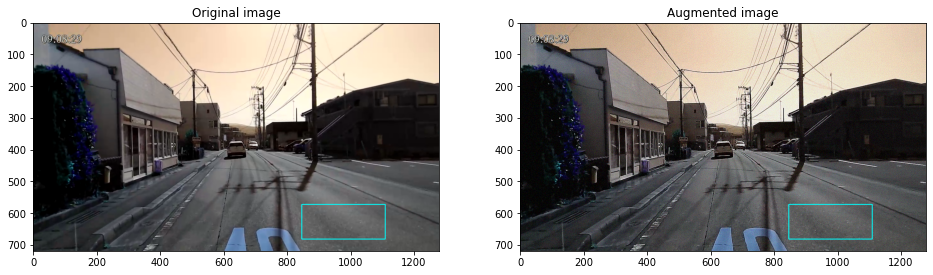

In [53]:
NO_OF_IMAGES = 2
NO_OF_AUGMENTATION = 3
data_augmentation(NO_OF_IMAGES, NO_OF_AUGMENTATION)